#PAIRWISE SEQUENCE ALIGNMENT OPTIMIZER
##Protein alignments
###Team number:5
Team members:Afra,Akshi,Nitharsana,Arshiha,Mariam,Nashath,Maha,Babisha,Blessy,Rithika,Devisree

###Project Introduction: Pairwise Sequence Alignment Optimizer
Pairwise sequence alignment is a fundamental technique in bioinformatics used to identify regions of similarity between two DNA or protein sequences. These similarities can provide insights into functional, structural, or evolutionary relationships.

####Input:
Two sequences (DNA or protein)

Choice of alignment type: Local (Smith-Waterman) or Global (Needleman-Wunsch)

Scoring matrix (default or custom)

Gap opening penalty

Gap extension penalty

####Processing:
Perform alignment based on selected parameters

Compute quality metrics:

Alignment score

Percent identity

Number of gaps

Alignment length

Optionally,

####Output:
Alignment display

Plots comparing scores and metrics for different parameters

In [ ]:
pip install biopython matplotlib seaborn pandas


In [ ]:
from Bio import Align
from Bio.Align import substitution_matrices
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
def perform_alignment(seq1, seq2, match_score=1.0, mismatch_score=-1.0, gap_penalty=-2.0, mode='global'):
    # Load a substitution matrix (e.g., BLOSUM62 for proteins)
    matrix = substitution_matrices.load("BLOSUM62")

    # Initialize the aligner
    aligner = Align.PairwiseAligner()
    aligner.mode = mode
    aligner.match_score = match_score
    aligner.mismatch_score = mismatch_score
    aligner.substitution_matrix = matrix
    aligner.gap_score = gap_penalty

    # Perform the alignment
    alignments = aligner.align(seq1, seq2)
    return alignments


In [ ]:
def plot_alignment_scores(alignments):
    # Extract scores and identities
    scores = [alignment.score for alignment in alignments]
    identities = [alignment.identity for alignment in alignments]

    # Create a DataFrame
    df = pd.DataFrame({
        'Alignment': [f'Alignment {i+1}' for i in range(len(alignments))],
        'Score': scores,
        'Identity (%)': [i * 100 for i in identities]
    })

    # Set up the matplotlib figure
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot alignment scores
    sns.barplot(x='Alignment', y='Score', data=df, ax=axes[0])
    axes[0].set_title('Alignment Scores')

    # Plot identity percentages
    sns.barplot(x='Alignment', y='Identity (%)', data=df, ax=axes[1])
    axes[1].set_title('Identity Percentages')

    plt.tight_layout()
    plt.show()


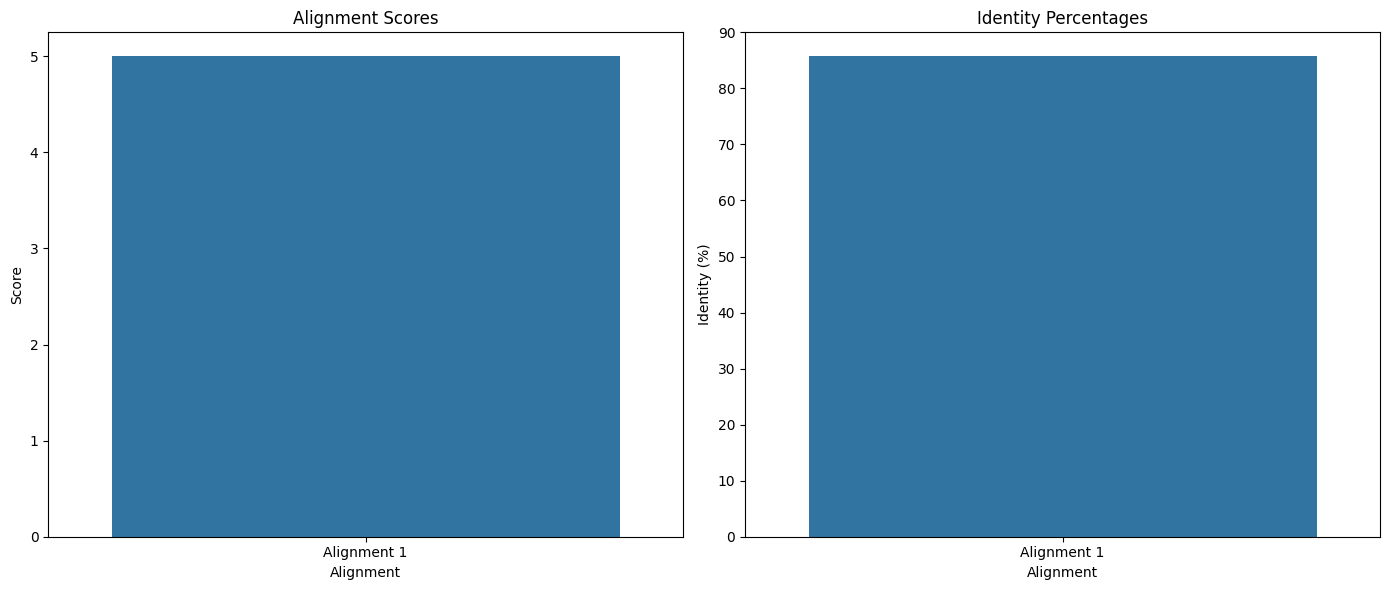

In [ ]:
from Bio import Align
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def calculate_identity(alignment):
    """Calculate the percentage of identical matches in the alignment."""
    matches = sum(1 for a, b in zip(alignment.query, alignment.target) if a == b and a != '-' and b != '-')
    total = len(alignment.query)
    return (matches / total) * 100 if total > 0 else 0

def plot_alignment_scores(alignments):
    """Plot alignment scores and identity percentages."""
    scores = [alignment.score for alignment in alignments]
    identities = [calculate_identity(alignment) for alignment in alignments]

    df = pd.DataFrame({
        'Alignment': [f'Alignment {i+1}' for i in range(len(alignments))],
        'Score': scores,
        'Identity (%)': identities
    })

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.barplot(x='Alignment', y='Score', data=df, ax=axes[0])
    axes[0].set_title('Alignment Scores')

    sns.barplot(x='Alignment', y='Identity (%)', data=df, ax=axes[1])
    axes[1].set_title('Identity Percentages')

    plt.tight_layout()
    plt.show()

# Example sequences
seq1 = "AGCTGAC"
seq2 = "AGCTGGC"

# Initialize the aligner
aligner = Align.PairwiseAligner()
aligner.mode = 'global'
aligner.match_score = 1
aligner.mismatch_score = -1
aligner.gap_score = -2

# Perform the alignment
alignments = aligner.align(seq1, seq2)

# Plot results
plot_alignment_scores(alignments)


/usr/local/lib/python3.11/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(



=== GLOBAL ALIGNMENT ===
ACCGT
| || 
A-CG-
  Score=2

Metrics: {'Score': 2.0, 'Identity %': 60.0, 'Gaps': 2, 'Length': 5}

=== LOCAL ALIGNMENT ===
3 CG
  ||
2 CG
  Score=4

Metrics: {'Score': 4.0, 'Identity %': 40.0, 'Gaps': 2, 'Length': 5}


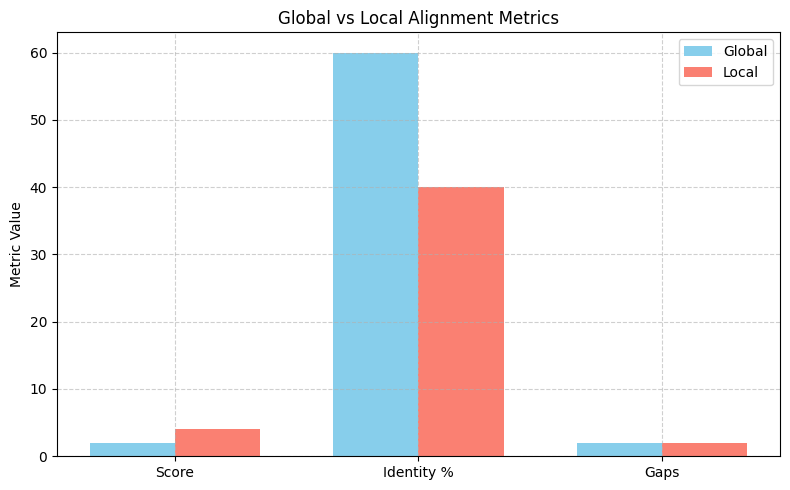

In [ ]:
import matplotlib.pyplot as plt
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# === CONFIGURATION === #
seq1 = "ACCGT"
seq2 = "ACG"

# DNA scoring
match = 2
mismatch = -1
gap_open = -2
gap_extend = -0.5

# === ALIGNMENT FUNCTION === #
def perform_alignment(seq1, seq2, alignment_type):
    try:
        if alignment_type == "global":
            return pairwise2.align.globalms(seq1, seq2, match, mismatch, gap_open, gap_extend)
        elif alignment_type == "local":
            return pairwise2.align.localms(seq1, seq2, match, mismatch, gap_open, gap_extend)
    except Exception as e:
        print(f"Error during {alignment_type} alignment: {e}")
        return []
    return []

# === METRIC FUNCTION === #
def compute_metrics(alignment):
    aligned_seq1, aligned_seq2, score, start, end = alignment
    matches = sum(1 for a, b in zip(aligned_seq1, aligned_seq2) if a == b)
    length = len(aligned_seq1)
    identity = (matches / length) * 100 if length else 0
    gaps = aligned_seq1.count('-') + aligned_seq2.count('-')
    return {
        "Score": round(score, 2),
        "Identity %": round(identity, 2),
        "Gaps": gaps,
        "Length": length
    }

# === RUN ALIGNMENTS === #
global_result = perform_alignment(seq1, seq2, "global")[0]
local_result = perform_alignment(seq1, seq2, "local")[0]

# === COMPUTE METRICS === #
global_metrics = compute_metrics(global_result)
local_metrics = compute_metrics(local_result)

# === DISPLAY RESULTS === #
print("\n=== GLOBAL ALIGNMENT ===")
print(format_alignment(*global_result))
print("Metrics:", global_metrics)

print("\n=== LOCAL ALIGNMENT ===")
print(format_alignment(*local_result))
print("Metrics:", local_metrics)

# === VISUALIZATION === #
labels = ['Score', 'Identity %', 'Gaps']
global_values = [global_metrics['Score'], global_metrics['Identity %'], global_metrics['Gaps']]
local_values = [local_metrics['Score'], local_metrics['Identity %'], local_metrics['Gaps']]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar([i - width/2 for i in x], global_values, width, label='Global', color='skyblue')
plt.bar([i + width/2 for i in x], local_values, width, label='Local', color='salmon')

plt.ylabel('Metric Value')
plt.title('Global vs Local Alignment Metrics')
plt.xticks(x, labels)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()